# Loading libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import calendar

from pprint import pprint

from datetime import datetime

from IPython.core.display import HTML

from sklearn import linear_model
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.svm import SVR
from sklearn.ensemble import VotingRegressor

from pylab import rcParams

# Additional configuration
np.set_printoptions(precision=2)
%matplotlib inline


# On which day of the week is the second drug (M01AE) most often sold?

In [2]:
pharmaDF = pd.read_csv("data/salesdaily.csv")

In [3]:
pharmaDF.head()

,datum,M01AB,M01AE,N02BA,N02BE,N05B,N05C,R03,R06,Year,Month,Hour,Weekday Name
0,1/2/2014,0.0,3.67,3.4,32.40,7.0,0.0,0.0,2.0,2014,1,248,Thursday
1,1/3/2014,8.0,4.00,4.4,50.60,16.0,0.0,20.0,4.0,2014,1,276,Friday
2,1/4/2014,2.0,1.00,6.5,61.85,10.0,0.0,9.0,1.0,2014,1,276,Saturday
3,1/5/2014,4.0,3.00,7.0,41.10,8.0,0.0,3.0,0.0,2014,1,276,Sunday
4,1/6/2014,5.0,1.00,4.5,21.70,16.0,2.0,6.0,2.0,2014,1,276,Monday


In [5]:
# Group the second drug sales by weekday name
questionOneResult = pharmaDF[['M01AE', 'Weekday Name']].groupby(['Weekday Name'], as_index=False).sum().sort_values('M01AE', ascending=False)

In [6]:
questionOneResultDay = questionOneResult.iloc[0,0]
questionOneResultValue = round(questionOneResult.iloc[0,1], 2)

In [7]:
print('The second drug, M01AE, was most often sold on ' + str(questionOneResultDay) + ' with the volume of ' + str(questionOneResultValue))

The second drug, M01AE, was most often sold on Sunday with the volume of 1384.94


# Which three drugs have the highest sales in Jan 2015, Jul 2016, Sep 2017

In [9]:
pharmaDF = pd.read_csv("data/salesmonthly.csv")

In [10]:
pharmaDF.head()

,datum,M01AB,M01AE,N02BA,N02BE,N05B,N05C,R03,R06
0,2014-01-31,127.69,99.090,152.100,878.030,354.0,50.0,112.0,48.2
1,2014-02-28,133.32,126.050,177.000,1001.900,347.0,31.0,122.0,36.2
2,2014-03-31,137.44,92.950,147.655,779.275,232.0,20.0,112.0,85.4
3,2014-04-30,113.10,89.475,130.900,698.500,209.0,18.0,97.0,73.7
4,2014-05-31,101.79,119.933,132.100,628.780,270.0,23.0,107.0,123.7


In [11]:
def top3byMonth(month, year):
    """
    given a month and a year
    find top 3 drugs sold
    """
    month = str(month) if (month > 9) else '0'+str(month)
    year = str(year)
    # filter by date
    sales = pharmaDF.loc[pharmaDF['datum'].str.contains('^'+year+'\-'+month+'', flags=re.I, regex=True)]
    # reset index
    sales = sales.reset_index()
    # sort values horizontally
    topSales = sales[['M01AB', 'M01AE', 'N02BA', 'N02BE', 'N05B', 'N05C', 'R03', 'R06']].sort_values(by=0, ascending=False, axis=1)
    # print results
    print('Top 3 drugs by sale in '+calendar.month_name[int(month)]+' '+year)
    for field in topSales.columns.values[0:3]:
        print(' - Product: ' + str(field) + ', Volume sold: ' + str(round(topSales[field].iloc[0], 2)))
    print("\n")

In [12]:
# top3 drugs by sale in January 2015
top3byMonth(1, 2015)

# top3 drugs by sale in July 2016
top3byMonth(7, 2016)

# top3 drugs by sale in September 2017
top3byMonth(9, 2017)

Top 3 drugs by sale in January 2015
 - Product: N02BE, Volume sold: 1044.24
 - Product: N05B, Volume sold: 463.0
 - Product: R03, Volume sold: 177.25


Top 3 drugs by sale in July 2016
 - Product: N02BE, Volume sold: 652.36
 - Product: N05B, Volume sold: 240.0
 - Product: M01AB, Volume sold: 203.97


Top 3 drugs by sale in September 2017
 - Product: N02BE, Volume sold: 863.75
 - Product: N05B, Volume sold: 223.0
 - Product: R03, Volume sold: 139.0




# Which drug has sold most often on Mondays in 2017?

In [13]:
pharmaDF = pd.read_csv("data/salesdaily.csv")

In [14]:
pharmaDF.head()

,datum,M01AB,M01AE,N02BA,N02BE,N05B,N05C,R03,R06,Year,Month,Hour,Weekday Name
0,1/2/2014,0.0,3.67,3.4,32.40,7.0,0.0,0.0,2.0,2014,1,248,Thursday
1,1/3/2014,8.0,4.00,4.4,50.60,16.0,0.0,20.0,4.0,2014,1,276,Friday
2,1/4/2014,2.0,1.00,6.5,61.85,10.0,0.0,9.0,1.0,2014,1,276,Saturday
3,1/5/2014,4.0,3.00,7.0,41.10,8.0,0.0,3.0,0.0,2014,1,276,Sunday
4,1/6/2014,5.0,1.00,4.5,21.70,16.0,2.0,6.0,2.0,2014,1,276,Monday


In [15]:
pharmaDFMondays2017 = pharmaDF.loc[pharmaDF['datum'].str.contains('2017', flags=re.I, regex=True) & (pharmaDF['Weekday Name'] == 'Monday')]

In [16]:
pharmaDFMondays2017Top = pharmaDFMondays2017.groupby(['Weekday Name'], as_index=False).sum()

In [17]:
pharmaDFMondays2017Top = pharmaDFMondays2017Top[['M01AB', 'M01AE', 'N02BA', 'N02BE', 'N05B', 'N05C', 'R03', 'R06']].sort_values(by=0, ascending=False, axis=1)

In [18]:
for field in pharmaDFMondays2017Top.columns.values[0:1]:
    print('The drug most often sold on Mondays in 2017 is ' + str(field) + ' with the volume of ' + str(round(pharmaDFMondays2017Top[field].iloc[0], 2)))

The drug most often sold on Mondays in 2017 is N02BE with the volume of 1160.56


# What medicine sales may be in January 2020?

In [19]:
def scatterData(X_train, y_train, X_test, y_test, title):
    plt.title('Prediction using ' + title)
    plt.xlabel('Month sequence', fontsize=20)
    plt.ylabel('Sales', fontsize=20)

    # Scatter Plot
    plt.scatter(X_train, y_train, color='blue', label='Training observation points')
    plt.scatter(X_test, y_test, color='cyan', label='Testing observation points')

In [43]:
def predictLinearRegression(X_train, y_train, X_test, y_test):

    scatterData(X_train, y_train, X_test, y_test, 'Linear Regression')
    
    reg = linear_model.LinearRegression()
    reg.fit(X_train, y_train)
    plt.plot(X_train, reg.predict(X_train), color='red', label='Linear regressor')
    plt.legend()
    plt.show()

    # LINEAR REGRESSION - Predict/Test model
    y_predict_linear = reg.predict(X_test)

    # LINEAR REGRESSION - Predict for January 2020
    linear_predict = scale_y.inverse_transform(reg.predict(scale_X.transform([[predictFor]])))[0][0]
    # linear_predict = reg.predict([[predictFor]])[0]

    # LINEAR REGRESSION - Accuracy
    accuracy = reg.score(X_test, y_test)

    # LINEAR REGRESSION - Error
    error = round(np.mean((y_predict_linear-y_test)**2), 2)
    
    # Results
    display(HTML('<p>Linear Regression: <strong style="color: rgb(240,40,40)">' + str("{0:.2f}".format(linear_predict)) + '</strong> <span style="color:rgb(120,120,120)">(Accuracy: ' + str("{0:.2f}".format(accuracy*100)) + '%, Error: ' + str("{0:.2f}".format(error)) + ')</span></p>'))

    return {'regressor':reg, 'values':linear_predict}


In [50]:
def predictPolynominalRegression(X_train, y_train, X_test, y_test):
    
    scatterData(X_train, y_train, X_test, y_test, 'Polynominal Regression')
    
    poly_reg = PolynomialFeatures(degree = 2)
    X_poly = poly_reg.fit_transform(X_train)
    poly_reg_model = linear_model.LinearRegression()
    poly_reg_model.fit(X_poly, y_train)
    plt.plot(X_train, poly_reg_model.predict(poly_reg.fit_transform(X_train)), color='green', label='Polinominal regressor')
    plt.legend()
    plt.show()

    # POLYNOMINAL REGRESSION - Predict/Test model
    y_predict_polynominal = poly_reg_model.predict(X_poly)

    # POLYNOMINAL REGRESSION - Predict for January 2020
    polynominal_predict = scale_y.inverse_transform(poly_reg_model.predict(poly_reg.fit_transform(scale_X.transform([[predictFor]]))))[0][0]

    # POLYNOMINAL REGRESSION - Accuracy
    X_poly_test = poly_reg.fit_transform(X_test)
    accuracy = poly_reg_model.score(X_poly_test, y_test)

    # POLYNOMINAL REGRESSION - Error
    error = round(np.mean((y_predict_polynominal-y_train)**2), 2)

    # Result
    display(HTML('<p>Polynominal Regression: <strong style="color: rgb(240,40,40)">' + str("{0:.2f}".format(polynominal_predict)) + '</strong> <span style="color:rgb(120,120,120)">(Accuracy: ' + str("{0:.2f}".format(accuracy*100)) + '%, Error: ' + str("{0:.2f}".format(error)) + ')</span></p>'))
    return {'regressor':poly_reg_model, 'values':polynominal_predict}


In [65]:
def predictSVR(X_train, y_train, X_test, y_test):
    
    scatterData(X_train, y_train, X_test, y_test, 'Simple Vector Regression (SVR)')

    svr_regressor = SVR(kernel='rbf', gamma='auto')
    svr_regressor.fit(X_train, y_train.ravel())

    # plt.scatter(X_train, y_train, color='red', label='Actual observation points')
    plt.plot(X_train, svr_regressor.predict(X_train), label='SVR regressor')
    plt.legend()
    plt.show()

    # SIMPLE VECTOR REGRESSION (SVR) - Predict/Test model
    y_predict_svr = svr_regressor.predict(X_test)

    # SIMPLE VECTOR REGRESSION (SVR) - Predict for January 2020
    svr_predict = scale_y.inverse_transform(svr_regressor.predict(scale_X.transform([[predictFor]])))[0]

    # SIMPLE VECTOR REGRESSION (SVR) - Accuracy
    accuracy = svr_regressor.score(X_test, y_test)

    # SIMPLE VECTOR REGRESSION (SVR) - Error
    error = round(np.mean((y_predict_svr-y_train)**2), 2)
    
    # Result
    display(HTML('<p>Simple Vector Regression (SVR): <strong style="color: rgb(240,40,40)">' + str("{0:.2f}".format(svr_predict)) + '</strong> <span style="color:rgb(120,120,120)">(Accuracy: ' + str("{0:.2f}".format(accuracy*100)) + '%, Error: ' + str("{0:.2f}".format(error)) + ')</span></p>'))
    return {'regressor':svr_regressor, 'values':svr_predict}


In [42]:
product = 'M01AE'

# for storing all regression results
regResults = pd.DataFrame(columns=('Linear', 'Polynominal', 'SVR', 'Voting Regressor'), index=[product])

# to display a larger graph than a default with specify some additional parameters for Matplotlib library. This step is optional.
rcParams['figure.figsize'] = 12, 8

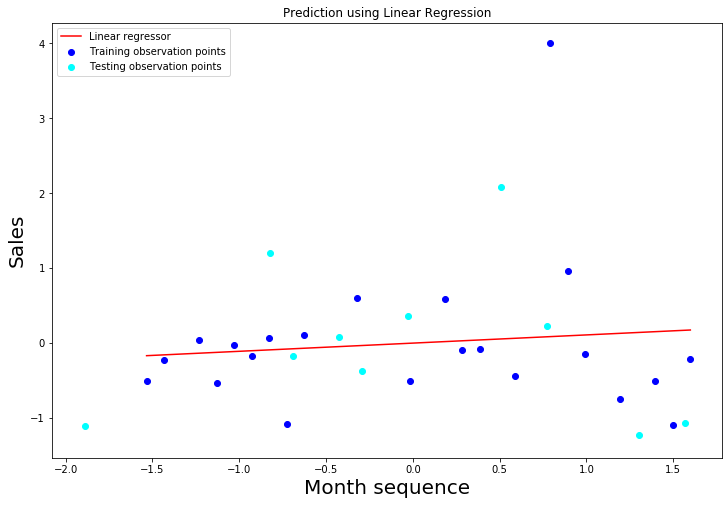

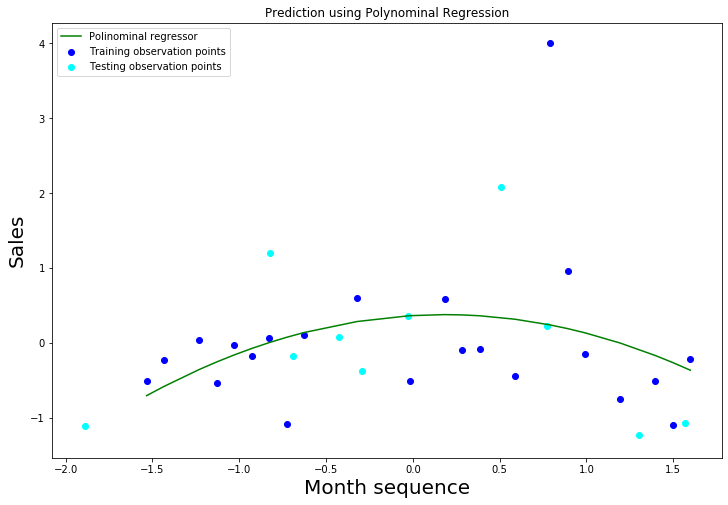

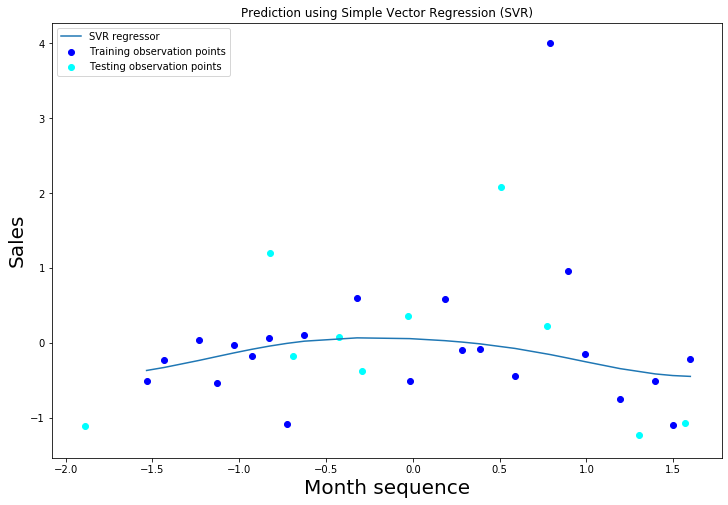

In [67]:
pharmaDF = pd.read_csv("data/salesmonthly.csv")

pharmaDFSmall = pharmaDF.loc[pharmaDF['datum'].str.contains("2017") | pharmaDF['datum'].str.contains("2018") | pharmaDF['datum'].str.contains("2019")]

pharmaDFSmall = pharmaDFSmall.reset_index()

# adding a sequence number for each month
pharmaDFSmall['datumNumber'] = 1
for index, row in pharmaDFSmall.iterrows():
    pharmaDFSmall.loc[index, 'datumNumber'] = index+1

# last available month is quite low which may indicate that it might be incomplete
# and skewing results and we can see a confirmation of that in salesdaily.csv
# so we're dropping it
pharmaDFSmall.drop(pharmaDFSmall.tail(1).index,inplace=True)

# delete if sales is 0
pharmaDFSmall = pharmaDFSmall[pharmaDFSmall['M01AE'] != 0]

# What value we predict for? January 2020. Because we have data until October 2019 not December 2019 we're predicting for 3 months ahead
predictFor = len(pharmaDFSmall)+3

# for storing regression results for the interation
regValues = {}

display(HTML('<h1>Predictions for the product ' + str(product) + ' sales in January 2020</h1>'))

pharmaDFSmall4Split = pharmaDFSmall[['datumNumber', product]]

# We are going to keep 30% of the dataset in test dataset
train, test = train_test_split(pharmaDFSmall4Split, test_size=3/10, random_state=0)

trainSorted = train.sort_values('datumNumber', ascending=True)
testSorted = test.sort_values('datumNumber', ascending=True)

X_train = trainSorted[['datumNumber']].values
y_train = trainSorted[product].values
X_test = testSorted[['datumNumber']].values
y_test = testSorted[product].values
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=3/10, random_state=0)

# Performing feature scaling

scale_X = StandardScaler()
scale_y = StandardScaler()

X_train = scale_X.fit_transform(X_train)
y_train = scale_y.fit_transform(y_train.reshape(-1, 1))

X_test = scale_X.fit_transform(X_test)
y_test = scale_y.fit_transform(y_test.reshape(-1, 1))

# LINEAR REGRESSION
linearResult = predictLinearRegression(X_train, y_train, X_test, y_test)
reg = linearResult['regressor']
regValues['Linear'] = linearResult['values']

# POLYNOMINAL REGRESSION
polynominalResult = predictPolynominalRegression(X_train, y_train, X_test, y_test)
polynominal_regressor = polynominalResult['regressor']
regValues['Polynominal'] = polynominalResult['values']

# SIMPLE VECTOR REGRESSION (SVR)
svrResult = predictSVR(X_train, y_train, X_test, y_test)
svr_regressor = svrResult['regressor']
regValues['SVR'] = svrResult['values']

# Voting Regressor
vRegressor = VotingRegressor(estimators=[('reg', reg), ('polynominal_regressor', polynominal_regressor), ('svr_regressor', svr_regressor)])

vRegressorRes = vRegressor.fit(X_train, y_train.ravel())

# VotingRegressor - Predict for January 2020
vRegressor_predict = scale_y.inverse_transform(vRegressor.predict(scale_X.transform([[predictFor]])))[0]
regValues['Voting Regressor'] = vRegressor_predict
display(HTML('<p>Voting Regressor: <strong style="color: rgb(240,40,40)">' + str("{0:.2f}".format(vRegressor_predict)) + '</strong></p>'))
    
# regResults = regResults.append(regValues, ignore_index=True)
regResults.loc[product] = regValues

In [49]:
poly_reg = PolynomialFeatures(degree = 2)
type(poly_reg)

sklearn.preprocessing._data.PolynomialFeatures